# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Adinda Salsabila
- **Email:** chacastastaria@gmail.com
- **ID Dicoding:** adinda_salsabila

## Menentukan Pertanyaan Bisnis

- What is the relationship between different weather conditions and the demand for bike rentals?
- Which season experiences the highest demand for bike rentals, and how can this inform advertising strategies?
- To what extent do holidays influence the volume of bike rentals compared to regular days?

## Import Semua Packages/Library yang Digunakan

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

* Reading the data

In [97]:
data_day = pd.read_csv('data/day.csv')
data_day.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
Dataset Characteristics (day.csv)

- **instant**: Record index
- **dteday**: Date of the record
- **season**: Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)
- **yr**: Year (0: 2011, 1: 2012)
- **mnth**: Month (from 1 to 12)
- **holiday**: Indicates if the day is a holiday (1: Yes, 0: No)
- **weekday**: Day of the week (0: Sunday, 6: Saturday)
- **workingday**: 1 if it’s a workday (neither a holiday nor weekend)
- **weathersit**: Weather condition:
  - 1: Clear or partly cloudy
  - 2: Misty or cloudy
  - 3: Light snow or rain, thunderstorm
  - 4: Heavy rain, snow, or fog
- **temp**: Normalized temperature in Celsius (divided by 41)
- **atemp**: Normalized "feels like" temperature in Celsius (divided by 50)
- **hum**: Normalized humidity (divided by 100)
- **windspeed**: Normalized wind speed (divided by 67)
- **casual**: Number of casual users
- **registered**: Number of registered users
- **cnt**: Total number of bike rentals (casual + registered)    

### Assessing Data

In [98]:
# Check if there's missing value
print("Checking if there's missing value on data_day: ")
data_day.isnull().sum()

Checking if there's missing value on data_day: 


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [99]:
# Check the type of the data
data_types = data_day.dtypes
print("\nData Types:\n", data_types)



Data Types:
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [100]:
# Check the shape of the data
print(f"Data Shape: {data_day.shape}")

Data Shape: (731, 16)


**Insight:**
- All columns are fully populated with no missing data, ensuring smooth analysis without data gaps.
- The dataset consists of integers, floats, and objects. The `dteday` column is stored as an object and may need conversion to a datetime format for time-series analysis.
- With 731 rows and 16 columns, the dataset represents daily records spanning approximately two years (2011-2012).

### Cleaning Data

In [101]:
# Convert 'dteday' to Datetime
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
print("Data Types after conversion:\n", data_day.dtypes)

Data Types after conversion:
 instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Cause this data set have no missing value, so it's not necessary to impute the missing value.
- The data set have no outlier, so it's not necessary to remove the outlier.
- I convert dteday to date format, so further it can be used the date to predict the bike rental count.

## Exploratory Data Analysis (EDA)

### Explore data_day

* Summary Statistics

In [102]:
# Display summary statistics
data_day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
-The data_day.describe() function provides a summary of the statistical characteristics of the dataset data_day.

## Visualization & Explanatory Analysis

### Question 1: What is the relationship between different weather conditions and the demand for bike rentals?


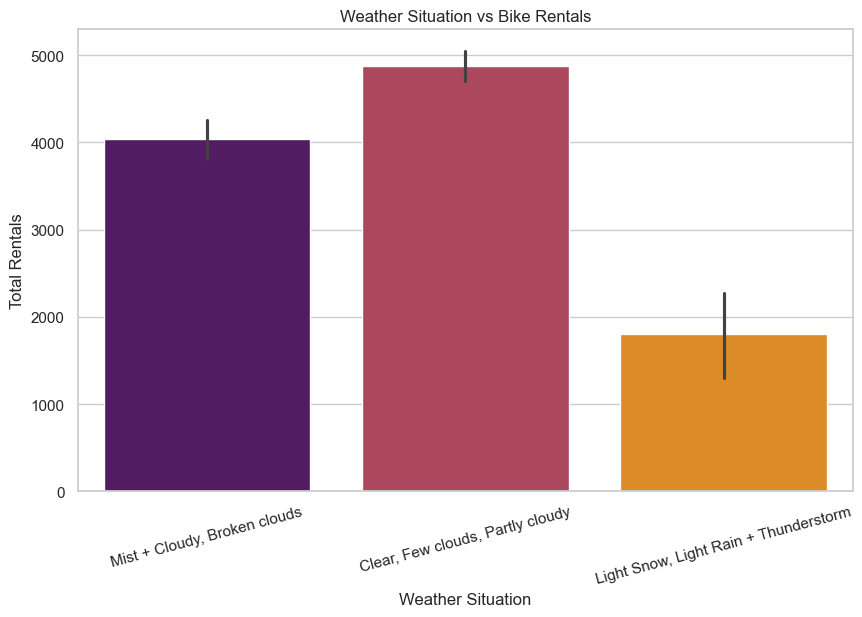

In [103]:
# Create a mapping for the 'weathersit' descriptions
weather_labels = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Broken clouds',
    3: 'Light Snow, Light Rain + Thunderstorm',
    4: 'Heavy Rain + Ice, Snow + Fog'
}

# Map the weathersit column to these labels
data_day['weathersit_desc'] = data_day['weathersit'].map(weather_labels)

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot for weathersit vs bike rentals
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit_desc', y='cnt', data=data_day, hue='weathersit_desc', palette='inferno')

# Add labels and title
plt.title('Weather Situation vs Bike Rentals')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')

# Rotate x labels for better readability
plt.xticks(rotation=15)

# Display the plot
plt.show()

**Insight:**
- Best weather situation which have the most bikes rented is during clear, few clouds, partly cloudy, partly cloudy, next continued by Mist + Cloudy and broken clouds, continued by light snow, light rain + thunderstorm.
- No records bikes rented during Heavy Rain + Ice and Snow + Fog

### Question 2: Which season experiences the highest demand for bike rentals, and how can this inform advertising strategies?



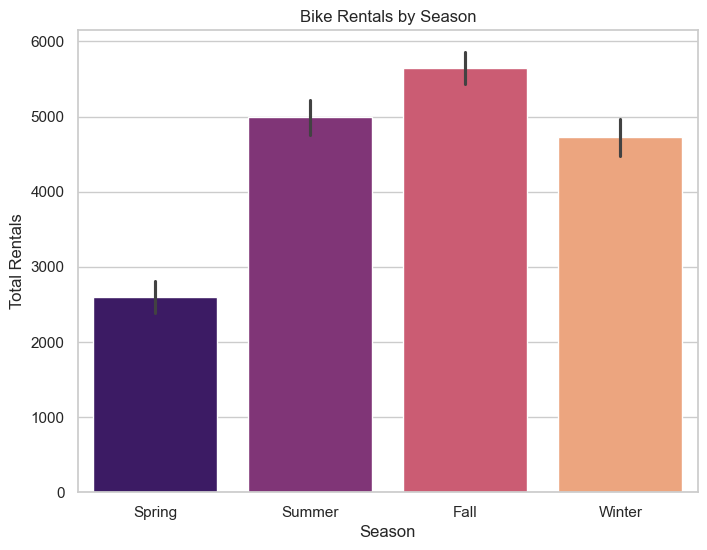

In [104]:
# Create a mapping for the 'season' descriptions
season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Map the season column to these labels
data_day['season_desc'] = data_day['season'].map(season_labels)

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot for season vs bike rentals
plt.figure(figsize=(8, 6))
sns.barplot(x='season_desc', y='cnt', data=data_day, hue='season_desc', palette='magma')

# Add labels and title
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')

# Display the plot
plt.show()

**INSIGHTS:**
- Fall have most bikes rented on
- Spring have most low bikes rented on
-  Prioritize marketing efforts during the fall season to increase bike rentals even more

With that, we can determine how weather in every seasons affects bike sharing count.

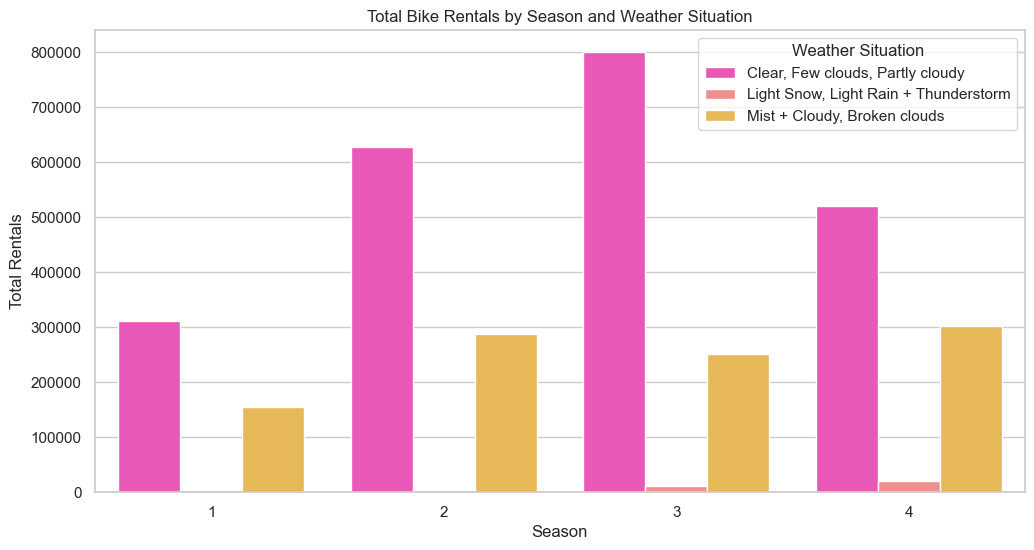

In [105]:
# Set the style for the plot
sns.set(style="whitegrid")

# Calculate total rentals grouped by season and weather situation
season_weather_data = data_day.groupby(['season', 'weathersit_desc'])['cnt'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', hue='weathersit_desc', data=season_weather_data, palette='spring')

# Add labels and title
plt.title('Total Bike Rentals by Season and Weather Situation')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend(title='Weather Situation')

# Display the plot
plt.show()


**Insight:**
- This plot shows the distribution of bike rentals by season and weather situation. It shows that the bike rentals are more popular during the fall months, with the highest number of bike rentals during the clear/few clouds/partly clouds in fall. 

### Question 3: To what extent do holidays influence the volume of bike rentals compared to regular days?

Text(0, 0.5, 'Total Rentals')

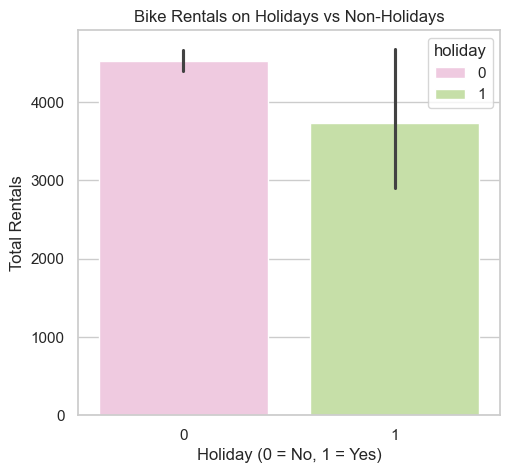

In [106]:
# Set plot style
sns.set(style="whitegrid")

# Step 2: Holiday impact on bike rentals
plt.figure(figsize=(12, 5))

# Holiday vs Non-holiday
plt.subplot(1, 2, 1)
sns.barplot(x='holiday', y='cnt', data=data_day, hue='holiday', palette='PiYG')
plt.title('Bike Rentals on Holidays vs Non-Holidays')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Total Rentals')

**Insight:**
- Comparing the total bike rentals on holidays (where holiday = 1) versus non-holidays (where holiday = 0).
-  The total rentals on holidays are significantly higher than on non-holidays, it suggests that people are more likely to rent bikes during these times, potentially due to more leisure activities or events happening.

## Analisis Lanjutan (Opsional)

## Seasonal Clustering of Bike Rentals

In [107]:
#Aggregate Rentals by Season
seasonal_rentals = data_day.groupby('season_desc')['cnt'].sum().reset_index()
seasonal_rentals.columns = ['Season', 'Total Rentals']

In [108]:
#Define rentals treshold
high_threshold = seasonal_rentals['Total Rentals'].quantile(0.75)  
low_threshold = seasonal_rentals['Total Rentals'].quantile(0.25) 


In [109]:
# Define rentals treshold
seasonal_rentals['Rental Category'] = np.where(
    seasonal_rentals['Total Rentals'] >= high_threshold, 'High Rental Season',
    np.where(seasonal_rentals['Total Rentals'] <= low_threshold, 'Low Rental Season', 'Moderate Rental Season')
)

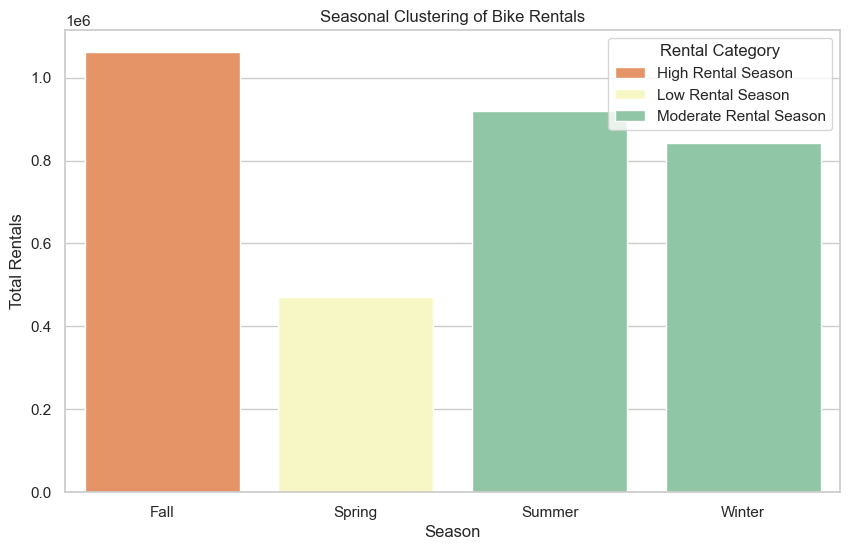

In [110]:
#Visualizing the clusters
plt.figure(figsize=(10, 6))  # Optional: Set figure size
sns.barplot(x='Season', y='Total Rentals', hue='Rental Category', data=seasonal_rentals, palette='Spectral')
plt.title('Seasonal Clustering of Bike Rentals')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend(title='Rental Category')
plt.show()

**Insight:**
- Based on the chart, Fall is clustered as 'High Rental Season'
- Spring are clustered as 'Low Rental Season'
- Winter and Summer are clustered as 'Moderate Rental Season'

## Conclusion

### Conclusion Question 1: What is the relationship between different weather conditions and the demand for bike rentals?

The analysis of bike rental demand reveals several key insights related to weather conditions. Optimal weather conditions occur during clear, few clouds, or partly cloudy weather, which encourages outdoor activities and presents an ideal opportunity to promote rentals. In contrast, moderate demand conditions are observed during misty and cloudy weather, where bike usage remains supported despite less favorable conditions. However, during challenging conditions, such as light snow, light rain, and thunderstorms, there is a noticeable decline in rentals, indicating reduced interest, although biking does not cease entirely. Finally, severe weather impacts are significant, as no rentals are recorded during heavy rain, ice, or fog, underscoring that severe weather deters customers and leads to no demand for bike rentals.



### Conclusion Question 2: Which season experiences the highest demand for bike rentals, and how can this inform advertising strategies?
Fall experiences the highest bike rentals, while spring shows the lowest demand.Focus marketing efforts during the fall season to capitalize on this trend leveraging promotional campaigns and targeted advertising to maximize bike rental opportunities.


### Conclusion Question 3: To what extent do holidays influence the volume of bike rentals compared to regular days?
This indicates a clear trend: people are more likely to rent bikes during holidays, driven by increased leisure activities and events. To maximize revenue, rental companies should implement targeted promotions and advertising campaigns during holiday periods, strategically highlighting bike rentals as an appealing option for leisure outings.


### Conclusion Analisis Lanjutan: Simple Clustering Rentals by Season
This clustered by 3, which is High rental season, low rental season and moderate rental season. Fall is considered as the high rental season.Winter and summer are clustered as the moderate rental season, while spring is considered as low rental season.
